# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Revisar e preparar os dados

In [2]:
# Carregar e preparar os dados
data = pd.read_csv('data_dummy.csv')

In [3]:
data = data.drop(data.columns[0], axis=1)
data.reset_index(drop=True, inplace=True)

In [4]:
print(data.shape)

(16650, 29)


In [5]:
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)

In [6]:
# Verificar se há duplicatas após a remoção
data.duplicated().sum()

0

In [7]:
print(data.shape)

(6770, 29)


In [8]:
# Verificar se valores missing
data.isna().sum().sum()

0

In [39]:
#verificar se 'mau' é bool
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   float64
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   float64
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   bool   
 10  posse_de_imovel_Y                       6770 non-null   bool

In [10]:
# Verificar o final do dataset
data.tail(3)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
6767,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False
6768,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False
6769,0,33.936986,3.630137,1,0,1,1,2.0,True,False,...,False,True,False,False,False,True,False,False,False,False


In [11]:
target = 'mau'
X = data.drop(columns=[target])
y = data[target]

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

# 1) Defina um objeto com a função da árvore de decisão vista em aula.

In [14]:
tree_clf = DecisionTreeClassifier(random_state=99)

In [15]:
# Dividir os dados em conjunto de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=99)

In [16]:
tree_clf = tree_clf.fit(X,y)

# 2) Treine o modelo com os dados que você separou para treinamento.

In [18]:
# Treinar o modelo
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

# 3) Visualize a árvore. Talvez você queira aumentar um pouco a figura.

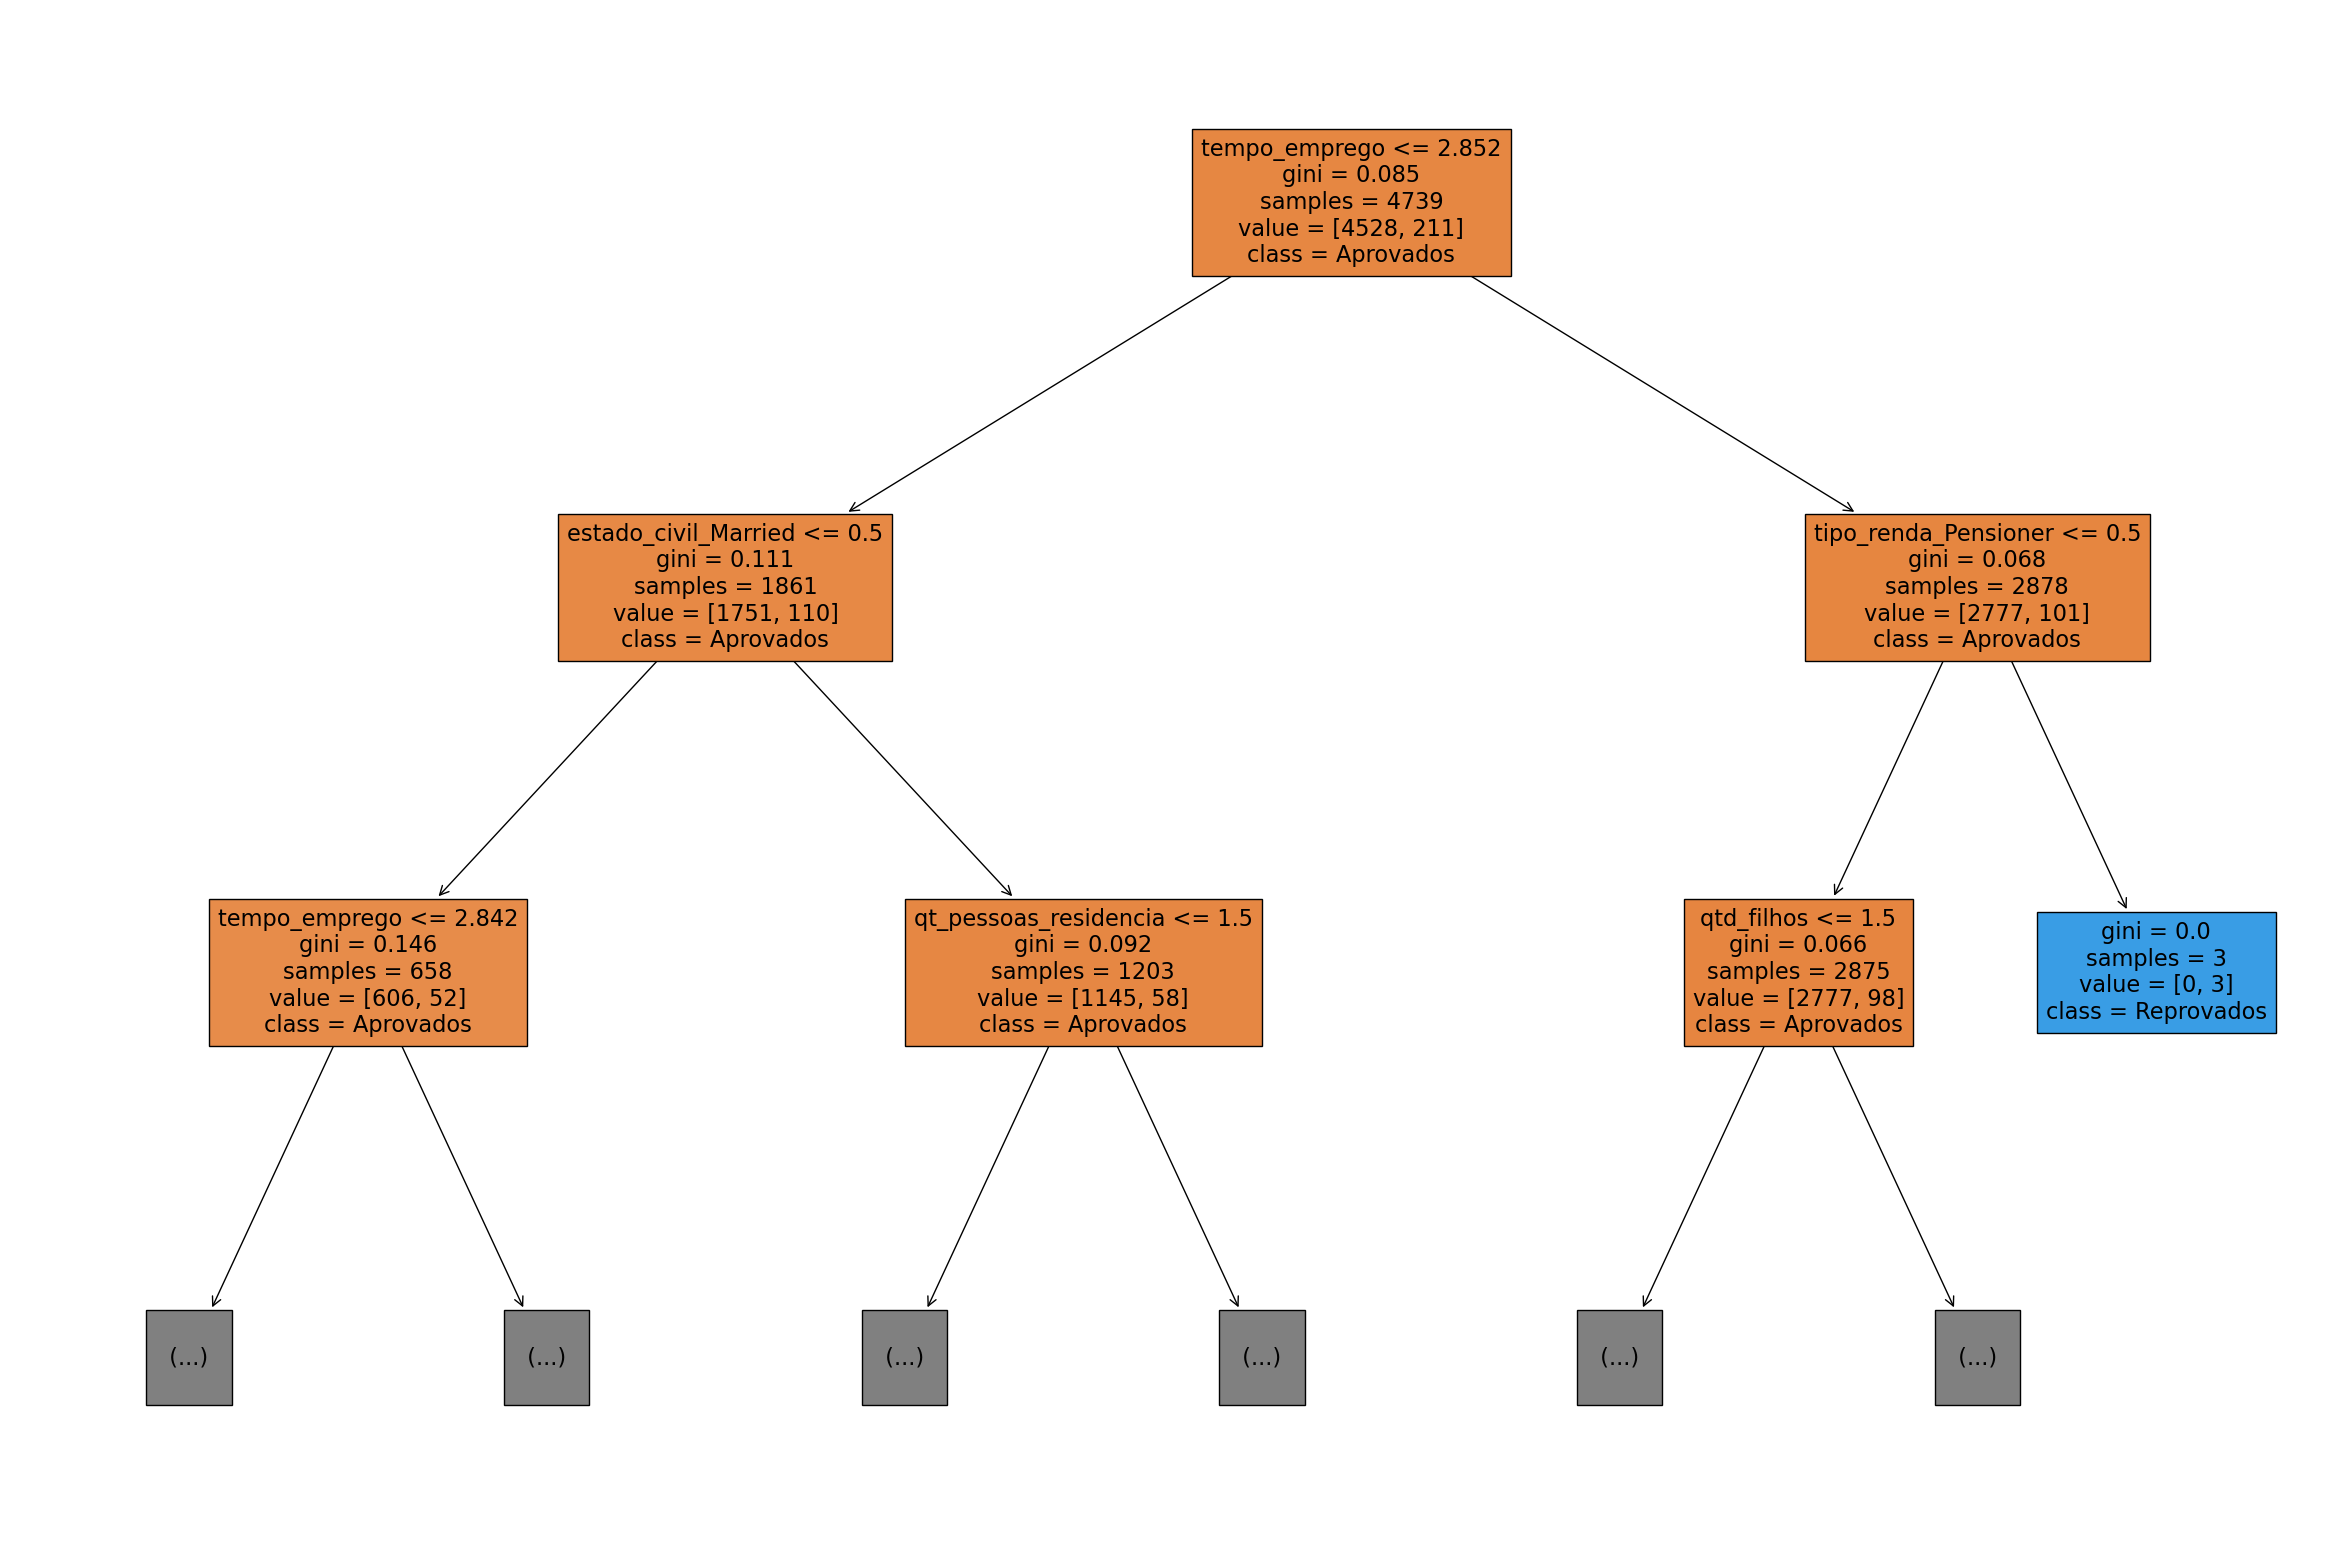

In [20]:
plt.figure(figsize=(30, 20))
plot_tree(tree_clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X.columns),
          max_depth=2)  # Limitar a profundidade da árvore
plt.show()

# 4) Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados"

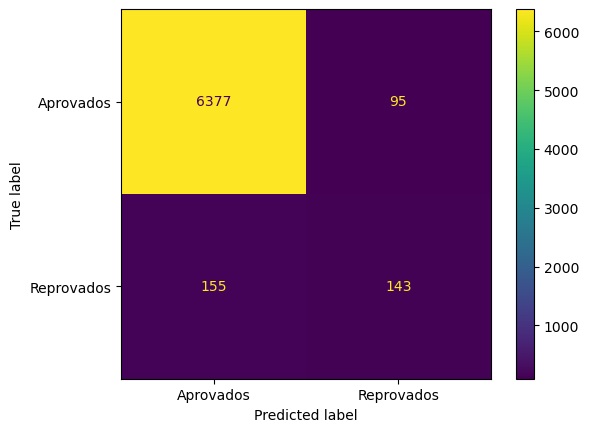

In [22]:
# Visualizar a matriz de confusão
preditos = tree_clf.predict(X)
cm = confusion_matrix(y, preditos, labels=tree_clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
MatrizDeConfusao.plot()

# 5) Calcular a acurácia no conjunto de treinamento

In [24]:
train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
print(f'Acurácia no conjunto de treinamento: {train_accuracy:.2f}')

Acurácia no conjunto de treinamento: 0.98


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

# 1) Classifique a base de teste de acordo com a árvore que você treinou no item 2.

In [51]:
# Fazer previsões no conjunto de validação (base de teste)
y_pred_val = tree_clf.predict(X_val)

# Calcular a matriz de confusão
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# 2) Produza a visualização da matriz de confusão para a base de teste.

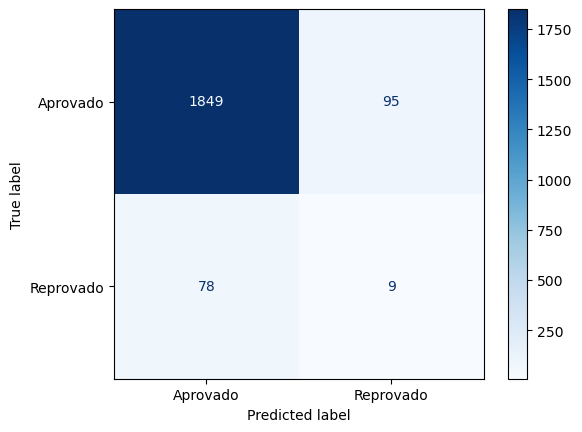

In [53]:
# Visualizar a matriz de confusão
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=['Aprovado', 'Reprovado'])
disp_val.plot(cmap=plt.cm.Blues)
plt.show()

# 3) Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [55]:
# Calcular a acurácia no conjunto de validação (base de teste)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Acurácia no conjunto de validação: {val_accuracy:.2f}')

# Calcular a acurácia no conjunto de treinamento
train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
print(f'Acurácia no conjunto de treinamento: {train_accuracy:.2f}')

Acurácia no conjunto de validação: 0.91
Acurácia no conjunto de treinamento: 0.98


# 4) Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.

In [57]:
# Use o random_state = 123
# Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como'maus'?

In [71]:
# Definir e treinar a nova árvore de decisão
tree_clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
tree_clf_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [73]:
# Fazer previsões no conjunto de validação com a nova árvore
y_pred_val_new = tree_clf_new.predict(X_val)

In [75]:
# Calcular a matriz de confusão para a nova árvore
conf_matrix_val_new = confusion_matrix(y_val, y_pred_val_new, labels=[False, True])

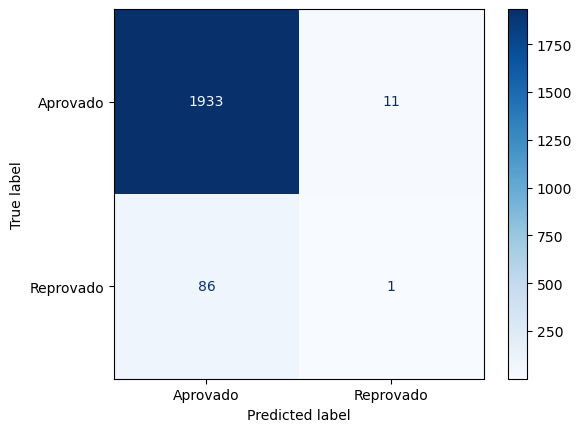

In [77]:
# Visualizar a matriz de confusão para a nova árvore
disp_val_new = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val_new, display_labels=['Aprovado', 'Reprovado'])
disp_val_new.plot(cmap=plt.cm.Blues)
plt.show()

In [79]:
# Calcular a proporção de proponentes classificados como "maus"
proporcao_maus = (y_pred_val_new == True).mean()
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.2f}')


Proporção de proponentes classificados como "maus": 0.01


# 5) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [84]:
# Calcular a proporção de proponentes classificados como "maus"
proporcao_bons = (y_pred_val_new == False).mean()
print(f'Proporção de proponentes classificados como "maus": {proporcao_bons:.2f}')


Proporção de proponentes classificados como "maus": 0.99
